# AdventureWorks Försäljningsanalys
Beskriv kort vad analysen handlar om

## Setup

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus

import os
from dotenv import load_dotenv

load_dotenv()

user = os.getenv("user")
password = quote_plus(os.getenv("password"))
server = os.getenv("server")
database = os.getenv("database")
driver = quote_plus("ODBC Driver 18 for SQL Server")


connection_string = (
    f"mssql+pyodbc://{user}:{password}@{server}/{database}"
    f"?driver={driver}&Encrypt=yes&TrustServerCertificate=yes"
)

engine = create_engine(connection_string)


try:
    with engine.connect():
        print("Anslutning till SQL Server lyckades")
except Exception as e:
    print("Kunde inte ansluta", e)

Anslutning till SQL Server lyckades


C:\Users\josef\AppData\Local\Temp\ipykernel_3972\114066081.py:27: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect():


In [4]:
def query_df(sql: str):
    with engine.connect() as conn:
        return pd.read_sql(text(sql), conn)

Förklara meningen med den här hjälpfunktionen. Hur hade det blivit om jag inte skapade den här funktionen först? Vad gör det liksom?

## Visualiseringar

### Visualisering 1: Antal produkter per kategori

<function matplotlib.pyplot.show(close=None, block=None)>

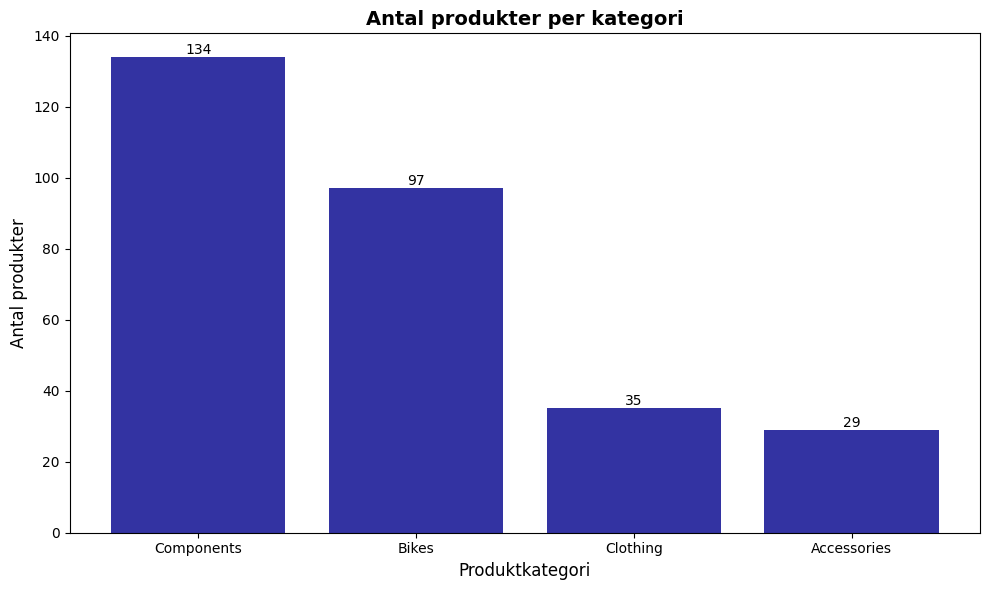

In [14]:
query_vis1 = """
SELECT
    pc.Name AS CategoryName,
    COUNT(DISTINCT p.ProductID) AS ProductCount
FROM Production.ProductCategory pc
INNER JOIN Production.ProductSubcategory psc ON pc.ProductCategoryID = psc.ProductCategoryID
INNER JOIN Production.Product p ON psc.ProductSubcategoryID = p.ProductSubcategoryID
GROUP BY pc.Name
ORDER BY ProductCount DESC
"""

df_vis1 = query_df(query_vis1)


fig, ax = plt.subplots(figsize=(10,6))

bars = ax.bar(df_vis1["CategoryName"], df_vis1["ProductCount"], color="darkblue", alpha=0.8)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom"
    )
    
    

ax.set_xlabel("Produktkategori", fontsize=12)
ax.set_ylabel("Antal produkter", fontsize=12)
ax.set_title("Antal produkter per kategori", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show


#### Insikter - Antal produkter per kategori

- Components är största kategorin med 134 produkter
- Accessories är minsta kategorin med 29 produkter 

Detta indikerar på att företaget är starkt fokuserat på komponenter och reservdelar. 

Komponenter utgör nästan mer än hälften av sortimentet. 

Accessoarer kan vara ett område där företaget kan utvecklas. 